In [0]:
from keras import backend as K

import warnings
warnings.filterwarnings('ignore')

import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D, DepthwiseConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

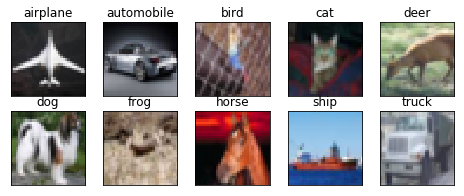

In [37]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [43]:
# Define the model
from keras.layers import Input
from keras.models import Model

inp = Input(shape=(32,32,3))  

#Normal Convolution
con_1 = Convolution2D(64, (3, 3), border_mode='same')(inp)
act_1 =  Activation('relu')(con_1)
batch_1 = BatchNormalization(axis=-1)(act_1)
drop_1 = Dropout(0.1)(batch_1)


con_2 = Convolution2D(128, (3, 3), border_mode='same')(drop_1)
act_2 =  Activation('relu')(con_2)
batch_2 = BatchNormalization(axis=-1)(act_2)
drop_2 = Dropout(0.1)(batch_2)

max_1 = MaxPooling2D(pool_size=(2, 2))(drop_2)
point_1 = Convolution2D(32, 1)(max_1)

#Seperable Convolution
sep_3 = Convolution2D(32, (3, 1), border_mode='same')(point_1)
con_3 = Convolution2D(64, (1, 3), border_mode='same')(sep_3)
act_3 =  Activation('relu')(con_3)
batch_3 = BatchNormalization(axis=-1)(act_3)
drop_3 = Dropout(0.1)(batch_3)

con_4 = Convolution2D(128, (3, 3), border_mode='same')(drop_3)
act_4 =  Activation('relu')(con_4)
batch_4 = BatchNormalization(axis=-1)(act_4)
drop_4 = Dropout(0.1)(batch_4)

max_2 = MaxPooling2D(pool_size=(2, 2))(drop_4)
point_2 = Convolution2D(32, 1)(max_2)

#Depthwise Convolution
con_5 = SeparableConv2D(64, (3, 3), border_mode='same')(point_2)
act_5 =  Activation('relu')(con_5)
batch_5 = BatchNormalization(axis=-1)(act_5)
drop_5 = Dropout(0.1)(batch_5)

con_6 = Convolution2D(128, (3, 3), border_mode='same')(drop_5)
act_6 =  Activation('relu')(con_6)
batch_6 = BatchNormalization(axis=-1)(act_6)
drop_6 = Dropout(0.1)(batch_6)

max_3 = MaxPooling2D(pool_size=(2, 2))(drop_6)
point_3 = Convolution2D(32, 1)(max_3)

#Group Convolution with 3x3 Kernel and 5x5 kernel
con_7 = Convolution2D(64, (3, 3), border_mode='same')(point_3)
con_8 = Convolution2D(128, (5, 5), border_mode='same')(point_3)
group_1 = Concatenate(name='conv_1_merge')([con_7, con_8])
act_8 =  Activation('relu')(group_1)
batch_8 = BatchNormalization(axis=-1)(act_8)
drop_8 = Dropout(0.1)(batch_8)

max_4 = MaxPooling2D(pool_size=(2, 2))(drop_8)
point_4 = Convolution2D(32, 1)(max_4)

#Group Convolution with 3x3 Kernel dilation = 1 and 3x3 kernel dilation =2
con_9 = Convolution2D(64, (3, 3), border_mode='same')(point_4)
con_10 = Convolution2D(128, (3, 3), dilation_rate=2, border_mode='same')(point_4)
group_2 = Concatenate(name='conv_2_merge')([con_9, con_10])
act_10 =  Activation('relu')(group_2)
batch_10 = BatchNormalization(axis=-1)(act_10)
drop_10 = Dropout(0.1)(batch_10)

point_10 = Convolution2D(10, 2)(drop_10)
flat = Flatten()(point_10)

output = Activation('softmax')(flat)




model = Model(inputs=inp, outputs=output)
model.summary()

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])





__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_367 (Conv2D)             (None, 32, 32, 64)   1792        input_27[0][0]                   
__________________________________________________________________________________________________
activation_241 (Activation)     (None, 32, 32, 64)   0           conv2d_367[0][0]                 
__________________________________________________________________________________________________
batch_normalization_218 (BatchN (None, 32, 32, 64)   256         activation_241[0][0]             
__________________________________________________________________________________________________
dropout_21

In [44]:
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 64
EPOCHS = 50

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rotation_range=20, horizontal_flip=True)
datagen.fit(train_features)

train_flow = datagen.flow(train_features, train_labels, batch_size=BATCH_SIZE)
valid_flow = datagen.flow(test_features, test_labels, batch_size=BATCH_SIZE, shuffle=False)

STEP_SIZE_TRAIN=train_flow.n//train_flow.batch_size
STEP_SIZE_VALID=valid_flow.n//valid_flow.batch_size

history = model.fit_generator(train_flow,
                    epochs=EPOCHS,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_flow,
                    validation_steps=STEP_SIZE_VALID)

Epoch 1/50
781/781 [==============================] - 44s 57ms/step - loss: 1.5003 - acc: 0.4622 - val_loss: 1.2420 - val_acc: 0.5723
Epoch 2/50
781/781 [==============================] - 36s 46ms/step - loss: 1.0714 - acc: 0.6203 - val_loss: 0.9442 - val_acc: 0.6699
Epoch 3/50
781/781 [==============================] - 36s 46ms/step - loss: 0.8905 - acc: 0.6897 - val_loss: 0.9064 - val_acc: 0.6935
Epoch 4/50
781/781 [==============================] - 36s 46ms/step - loss: 0.7863 - acc: 0.7253 - val_loss: 0.7493 - val_acc: 0.7327
Epoch 5/50
781/781 [==============================] - 35s 45ms/step - loss: 0.7107 - acc: 0.7524 - val_loss: 0.7249 - val_acc: 0.7492
Epoch 6/50
781/781 [==============================] - 35s 45ms/step - loss: 0.6632 - acc: 0.7703 - val_loss: 0.6852 - val_acc: 0.7622
Epoch 7/50
781/781 [==============================] - 35s 45ms/step - loss: 0.6296 - acc: 0.7806 - val_loss: 0.6283 - val_acc: 0.7818
Epoch 8/50
781/781 [==============================] - 35s 44ms

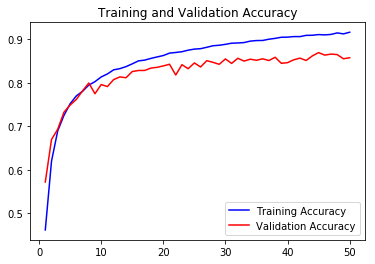

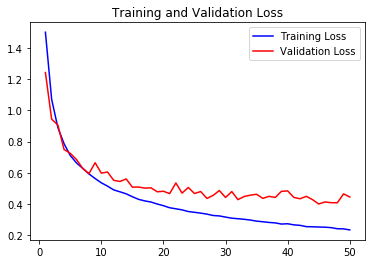

In [45]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and Validation Accuracy
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs,val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
#Train and Validation Loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs,val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

#Conclusion

### Accuracy achieved. 86.97 @ Epoch 45